In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Load data

In [25]:
df = pd.read_csv('../data/mushrooms.csv')

In [26]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Describe features:

- Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, -green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Classes

Note que só existem 2

In [27]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### Drop inicial

A feature abaixo possui somente uma categoria. Portanto, vamos dropar.

In [9]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [28]:
df.drop(columns=['veil-type'], inplace=True)

# 2) Análise exploratória

## Teste Chi2

Para medir a influência que as features tem sobre o nosso target (class), vamos utilizar o método do Chi2.

In [29]:
from dython.nominal import associations

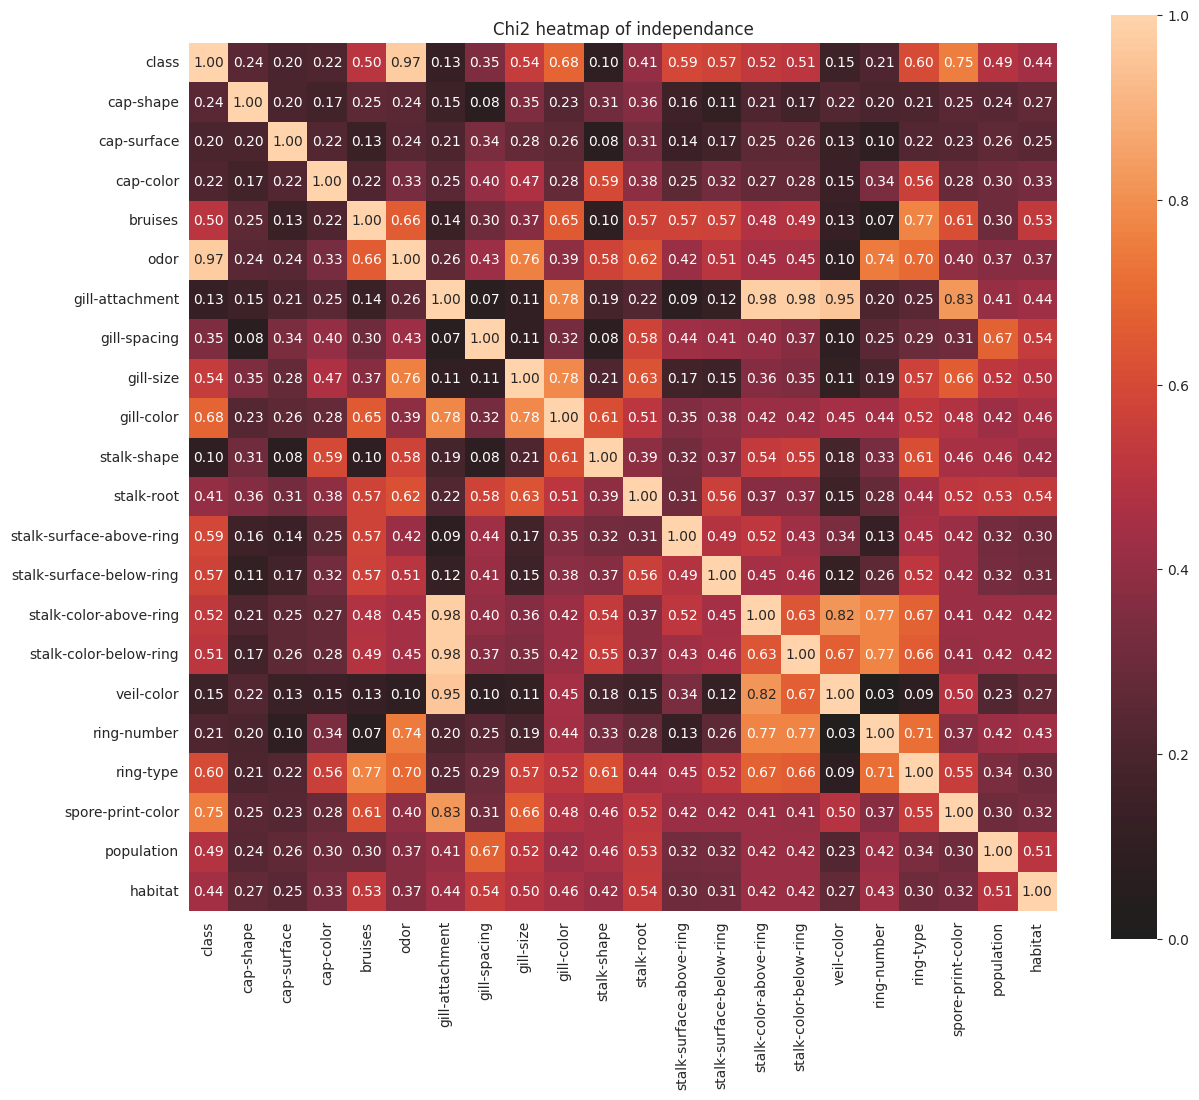

In [30]:
associations(df,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

### Conclusão:
- Já conseguimos ter uma direção de por onde procurar as melhores features, isto é, sabemos quais são as features que mais influenciam na variável que queremos prever.
- Nesse sentido, já podemos descartar algumas, como veil-color, stalk-shape, cap-surface...

## Análise superficial de features

Note que todas as features são categóricas. Logo, é importante se pensar em utilizar ferramentas para converter essas features em valores categóricos.

In [31]:
features = df.columns[1:]
features

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [32]:
target = [df.columns[0]]
target

['class']

### odor

De acordo com nosso teste, esse variável se mostra a mais relevante ao prevermos o target (class). Portanto, vamos avaliar ela e tentar tirar informações úteis a partir da mesma.

In [15]:
df['odor'].value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

<Axes: ylabel='odor'>

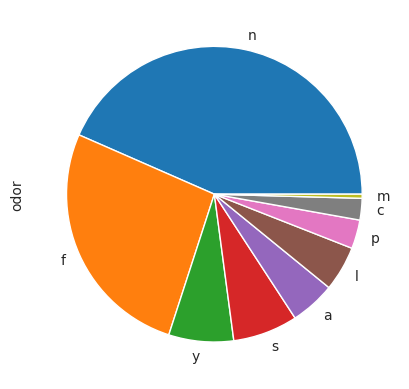

In [16]:
df['odor'].value_counts().plot.pie()

<Axes: >

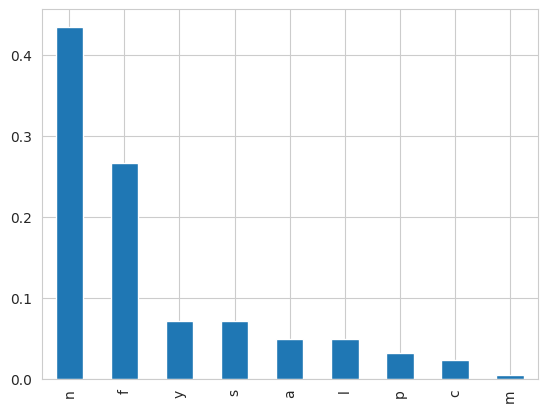

In [17]:
df['odor'].value_counts(True).plot.bar()

### spore-print-color

In [105]:
df['spore-print-color'].value_counts()

w    2381
n    1952
k    1856
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64

<AxesSubplot: ylabel='spore-print-color'>

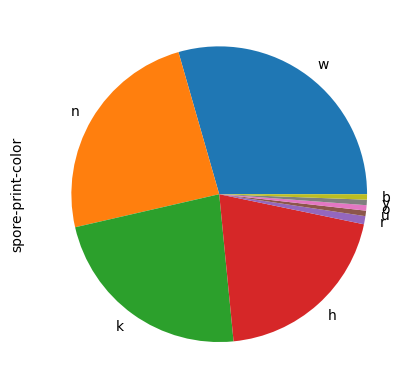

In [109]:
df['spore-print-color'].value_counts().plot.pie()

<AxesSubplot: >

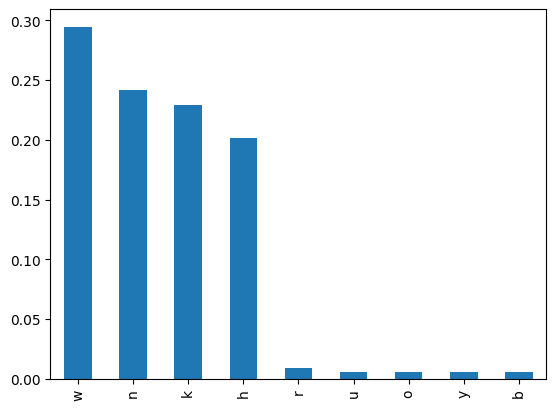

In [107]:
df['spore-print-color'].value_counts(True).plot.bar()

### gill-color

In [110]:
df['gill-color'].value_counts()

b    1728
p    1484
w    1196
n    1040
g     744
h     732
u     492
k     400
e      96
y      85
o      64
r      24
Name: gill-color, dtype: int64

<AxesSubplot: ylabel='gill-color'>

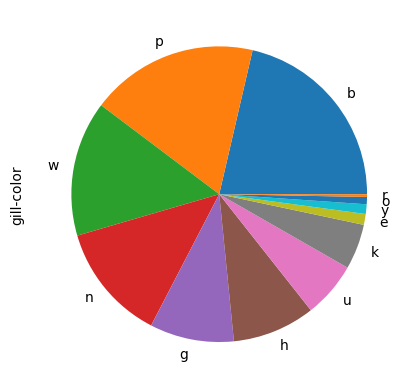

In [112]:
df['gill-color'].value_counts(True).plot.pie()

<AxesSubplot: >

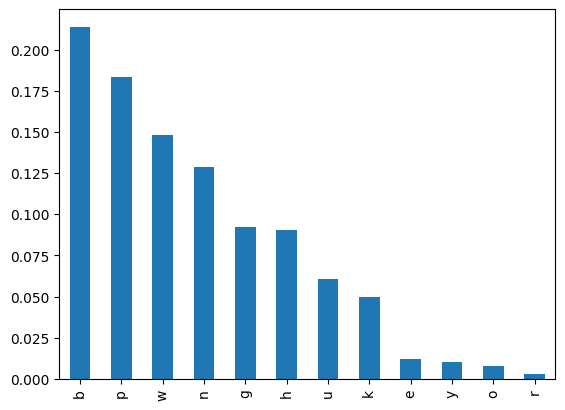

In [111]:
df['gill-color'].value_counts(True).plot.bar()

### ring-type

In [113]:
df['ring-type'].value_counts()

p    3931
e    2774
l    1296
f      48
n      36
Name: ring-type, dtype: int64

<AxesSubplot: ylabel='ring-type'>

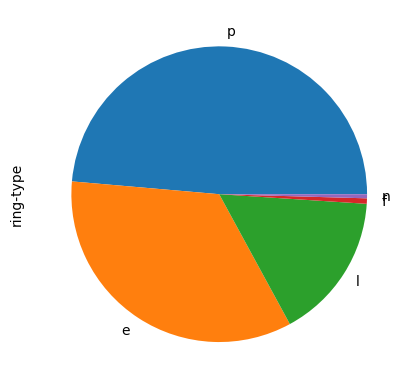

In [114]:
df['ring-type'].value_counts().plot.pie()

<AxesSubplot: >

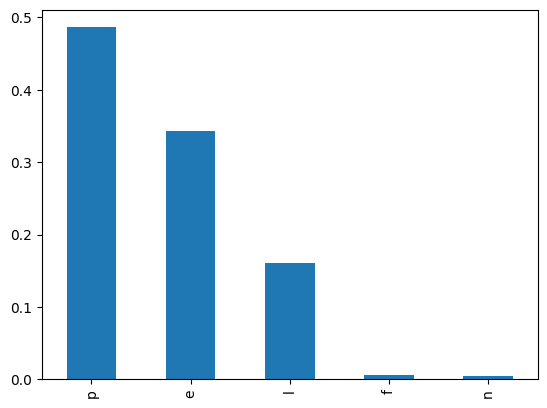

In [117]:
df['ring-type'].value_counts(True).plot.bar()

### stalk-surface-above-ring

In [118]:
df['stalk-surface-above-ring'].value_counts()

s    5139
k    2372
f     552
y      22
Name: stalk-surface-above-ring, dtype: int64

<AxesSubplot: ylabel='stalk-surface-above-ring'>

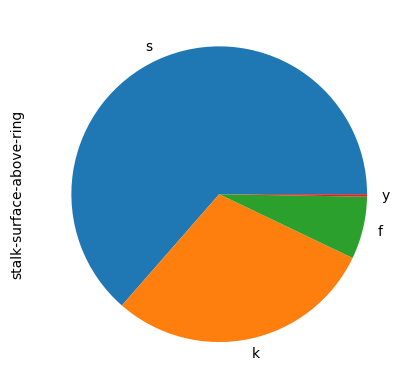

In [119]:
df['stalk-surface-above-ring'].value_counts().plot.pie()

<AxesSubplot: >

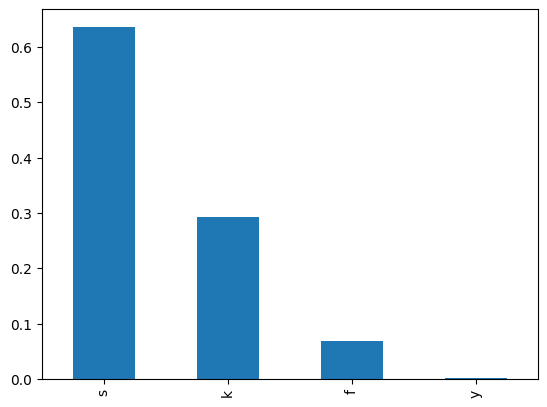

In [121]:
df['stalk-surface-above-ring'].value_counts(True).plot.bar()

### stalk-surface-below-ring

In [125]:
df['stalk-surface-below-ring'].value_counts()

s    4899
k    2304
f     600
y     282
Name: stalk-surface-below-ring, dtype: int64

<AxesSubplot: ylabel='stalk-surface-below-ring'>

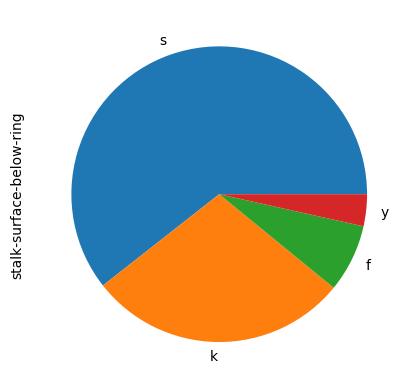

In [126]:
df['stalk-surface-below-ring'].value_counts().plot.pie()

<AxesSubplot: >

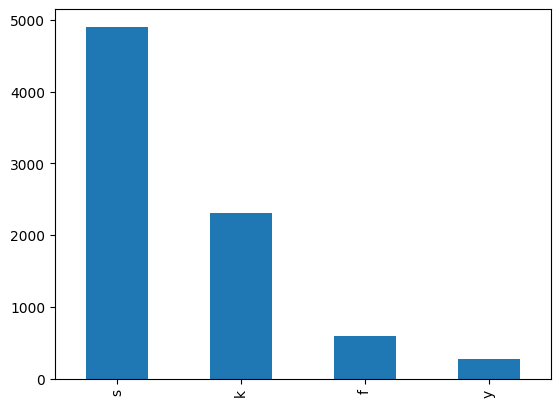

In [127]:
df['stalk-surface-below-ring'].value_counts().plot.bar()

### gill-size

In [128]:
df['gill-size'].value_counts()

b    5612
n    2473
Name: gill-size, dtype: int64

<AxesSubplot: ylabel='gill-size'>

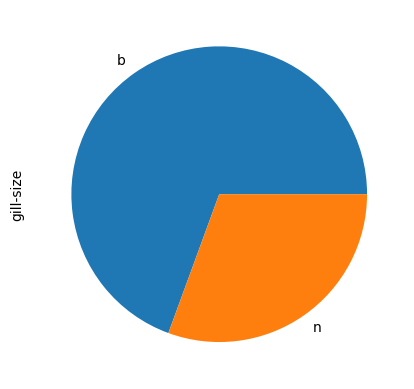

In [130]:
df['gill-size'].value_counts().plot.pie()

<AxesSubplot: >

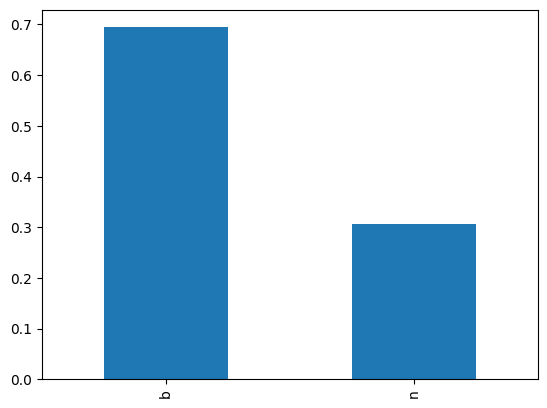

In [132]:
df['gill-size'].value_counts(True).plot.bar()

## Conclusão até aqui:
- As features acima são as que mais têm relação com o target. 
- Elas possuem grande granularidade.
- Elas possuem grande irregularidade. Dentro da massa de dados das mais granulares, as proporções são parecidas para poucas categorias.
- Vamos modelar com as seguintes classes: 'odor', 'spore-print-color', 'gill-color', 'ring-type', stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size'

### cap-shape

In [ ]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [ ]:
df['cap-shape'].value_counts(True)

x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64

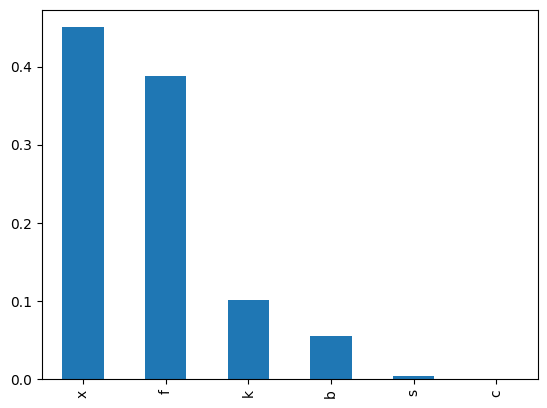

In [ ]:
df['cap-shape'].value_counts(True).plot(kind='bar');

## Conclusão:

- Vamos dropar as duas classes menores: c e s

In [33]:
df = df.loc[(df['cap-shape'] != 'c') & (df['cap-shape'] != 's')]

In [20]:
df.shape

(8088, 22)

### cap-surface

In [ ]:
df['cap-surface'].value_counts()

y    3241
s    2556
f    2288
g       3
Name: cap-surface, dtype: int64

In [ ]:
df['cap-surface'].value_counts(True)

y    0.400717
s    0.316024
f    0.282888
g    0.000371
Name: cap-surface, dtype: float64

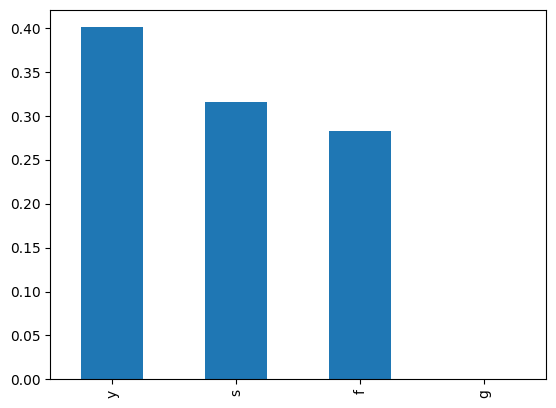

In [ ]:
df['cap-surface'].value_counts(True).plot(kind='bar');

In [34]:
df = df.loc[df['cap-surface'] != 'g']

# Conclusão:

- Vamos dropar a classe g

### cap-color

In [20]:
df['cap-color'].value_counts()

n    2268
g    1824
e    1500
y    1070
w    1035
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [21]:
df['cap-color'].value_counts(True)

n    0.280519
g    0.225603
e    0.185529
y    0.132344
w    0.128015
b    0.020779
p    0.017811
c    0.005442
u    0.001979
r    0.001979
Name: cap-color, dtype: float64

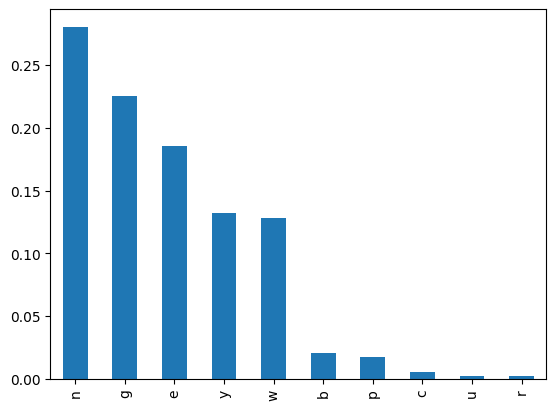

In [22]:
df['cap-color'].value_counts(True).plot(kind='bar');

### bruises

In [23]:
df['bruises'].value_counts()

f    4714
t    3371
Name: bruises, dtype: int64

In [24]:
df['bruises'].value_counts(True)

f    0.583055
t    0.416945
Name: bruises, dtype: float64

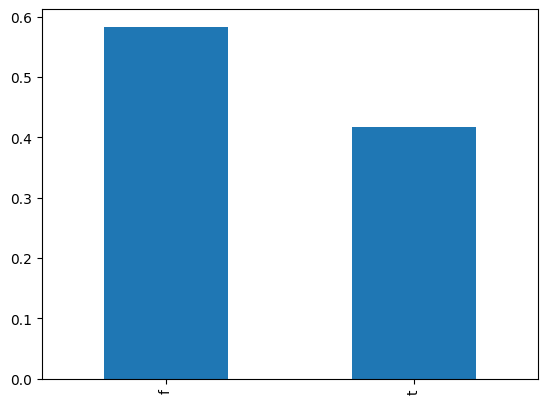

In [25]:
df['bruises'].value_counts(True).plot(kind='bar');

### veil-type

In [26]:
# df['veil-type'].value_counts()

Conclusão:
- Vamos cortar essa feature. Ela não nos dá informação nenhuma.

In [22]:
# df.drop('veil-type', axis=1, inplace=True)

KeyError: "['veil-type'] not found in axis"

In [23]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [24]:
features = [x for x in features if x != 'veil-type']
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

### ring-number

In [30]:
df['ring-number'].value_counts()

o    7449
t     600
n      36
Name: ring-number, dtype: int64

<AxesSubplot: >

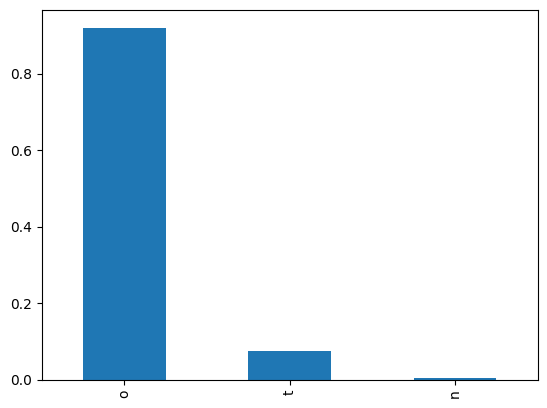

In [31]:
df['ring-number'].value_counts(True).plot(kind='bar')

## Gill-atachment

In [32]:
df['gill-attachment'].value_counts()  

f    7875
a     210
Name: gill-attachment, dtype: int64

In [33]:
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

## Gill-atachment

In [34]:
df['gill-spacing'].value_counts()

c    6780
w    1305
Name: gill-spacing, dtype: int64

## Gill-size

In [35]:
df['gill-size'].value_counts()

b    5612
n    2473
Name: gill-size, dtype: int64

## gill-color

In [36]:
df['gill-color'].value_counts()

b    1728
p    1484
w    1196
n    1040
g     744
h     732
u     492
k     400
e      96
y      85
o      64
r      24
Name: gill-color, dtype: int64

## stalk-shape

In [37]:
df['stalk-shape'].value_counts()

t    4608
e    3477
Name: stalk-shape, dtype: int64

## stalk-root

In [38]:
df['stalk-root'].value_counts()

b    3771
?    2480
e    1088
c     554
r     192
Name: stalk-root, dtype: int64

- Many missing values

## stalk-surface-above-ring

In [39]:
df['stalk-surface-above-ring'].value_counts()

s    5139
k    2372
f     552
y      22
Name: stalk-surface-above-ring, dtype: int64

## stalk-surface-below-ring

In [40]:
df['stalk-surface-below-ring'].value_counts()

s    4899
k    2304
f     600
y     282
Name: stalk-surface-below-ring, dtype: int64

## stalk-color-above-ring

In [41]:
df['stalk-color-above-ring'].value_counts()

w    4427
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       6
Name: stalk-color-above-ring, dtype: int64

## stalk-color-below-ring

In [42]:
df['stalk-color-below-ring'].value_counts()

w    4347
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      22
Name: stalk-color-below-ring, dtype: int64

## veil-color

In [43]:
df['veil-color'].value_counts()

w    7887
n      96
o      96
y       6
Name: veil-color, dtype: int64

## ring-number

In [44]:
df['ring-number'].value_counts()

o    7449
t     600
n      36
Name: ring-number, dtype: int64

## ring-type

In [45]:
df['ring-type'].value_counts()

p    3931
e    2774
l    1296
f      48
n      36
Name: ring-type, dtype: int64

## spore-print-color

In [46]:
df['spore-print-color'].value_counts()

w    2381
n    1952
k    1856
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64

## population

In [47]:
df['population'].value_counts()

v    4024
y    1696
s    1248
n     400
a     384
c     333
Name: population, dtype: int64

## habitat

In [48]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     825
u     336
m     292
w     192
Name: habitat, dtype: int64

## Conclusão inicial:

- Vamos selecionar as features menos granulares e mais equilibradas
- Selecionadas: 'habitat', 'population', 'ring-type', 'stalk-surface-below-ring', 'stalk-shape', 'gill-size', 'gill-spacing'

In [35]:
pre_features = ['habitat', 'population', 'ring-type', 'stalk-surface-below-ring', 'stalk-shape', 'gill-size', 'gill-spacing', 'odor', 'spore-print-color',
               'gill-color']
pre_features = ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size']

## Seccionando dataset

In [36]:
X, y = df[pre_features], df[target]

In [37]:
y.value_counts()

class
e        4176
p        3909
dtype: int64

In [38]:
X.columns

Index(['odor', 'spore-print-color', 'gill-color', 'ring-type',
       'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size'],
      dtype='object')

# 3) Inicio de aplicações de preprocessamento

In [40]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [41]:
pre_processor = ColumnTransformer([
    ('onehot', OneHotEncoder(), pre_features)
])

In [42]:
encoder_class = LabelEncoder()

In [43]:
encoder_class.fit_transform(y.values.reshape(-1,1))

/home/sidr/PycharmProjects/neural-networks/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 0, 1, 0])

In [44]:
X_encoded, y_encoded = pre_processor.fit_transform(X).toarray(), encoder_class.fit_transform(y.values.reshape(-1,1))

/home/sidr/PycharmProjects/neural-networks/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print(X_encoded.shape)
print(y_encoded.shape)

(8085, 45)
(8085,)


In [51]:
b = y_encoded[:, np.newaxis]     # или b.reshape((3, 1))

# Объединение двух массивов в массив shape (3, 5)
c = np.hstack((X_encoded, b))

c.shape

(8085, 46)

In [68]:
np.savetxt('../data/mush2.csv', c, delimiter=',')

1


# 4) Model construction

In [165]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=56, test_size=0.25, stratify=y_encoded)

In [167]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [170]:
model = XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=24
)

In [171]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [172]:
y_predict = model.predict(X_test)

In [173]:
accuracy_score(y_test, y_predict)

1.0

In [174]:
matrix = confusion_matrix(y_test, y_predict, labels=[0, 1])

Text(58.222222222222214, 0.5, 'True Label')

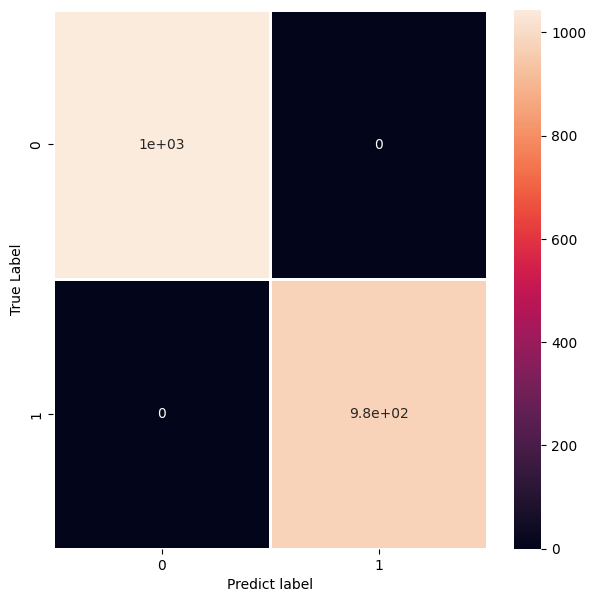

In [175]:
plt.figure(figsize=(7, 7))
sns.heatmap(matrix, annot=True, linewidths=1)
plt.xlabel('Predict label')
plt.ylabel('True Label')

In [176]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred=y_predict, labels=[0, 1])
precision, recall, f1, support

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1044,  978], dtype=int64))

### Features importances

In [177]:
pre_processor.get_feature_names_out(), model.feature_importances_

(array(['onehot__odor_a', 'onehot__odor_c', 'onehot__odor_f',
        'onehot__odor_l', 'onehot__odor_m', 'onehot__odor_n',
        'onehot__odor_p', 'onehot__odor_s', 'onehot__odor_y',
        'onehot__spore-print-color_b', 'onehot__spore-print-color_h',
        'onehot__spore-print-color_k', 'onehot__spore-print-color_n',
        'onehot__spore-print-color_o', 'onehot__spore-print-color_r',
        'onehot__spore-print-color_u', 'onehot__spore-print-color_w',
        'onehot__spore-print-color_y', 'onehot__gill-color_b',
        'onehot__gill-color_e', 'onehot__gill-color_g',
        'onehot__gill-color_h', 'onehot__gill-color_k',
        'onehot__gill-color_n', 'onehot__gill-color_o',
        'onehot__gill-color_p', 'onehot__gill-color_r',
        'onehot__gill-color_u', 'onehot__gill-color_w',
        'onehot__gill-color_y', 'onehot__ring-type_e',
        'onehot__ring-type_f', 'onehot__ring-type_l',
        'onehot__ring-type_n', 'onehot__ring-type_p',
        'onehot__stalk-surfa

In [178]:
pre_processor.get_feature_names_out().shape, model.feature_importances_.shape

((45,), (45,))

In [179]:
kv = sorted([(k, v) for k, v in zip(pre_processor.get_feature_names_out(), model.feature_importances_)], key=lambda x: x[1], reverse=True)

In [180]:
keys, values = [x[0] for x in kv], [x[1] for x in kv]

C:\Users\gabri\AppData\Local\Temp\ipykernel_75244\3541868696.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

  ax.grid(b = True, color ='grey',


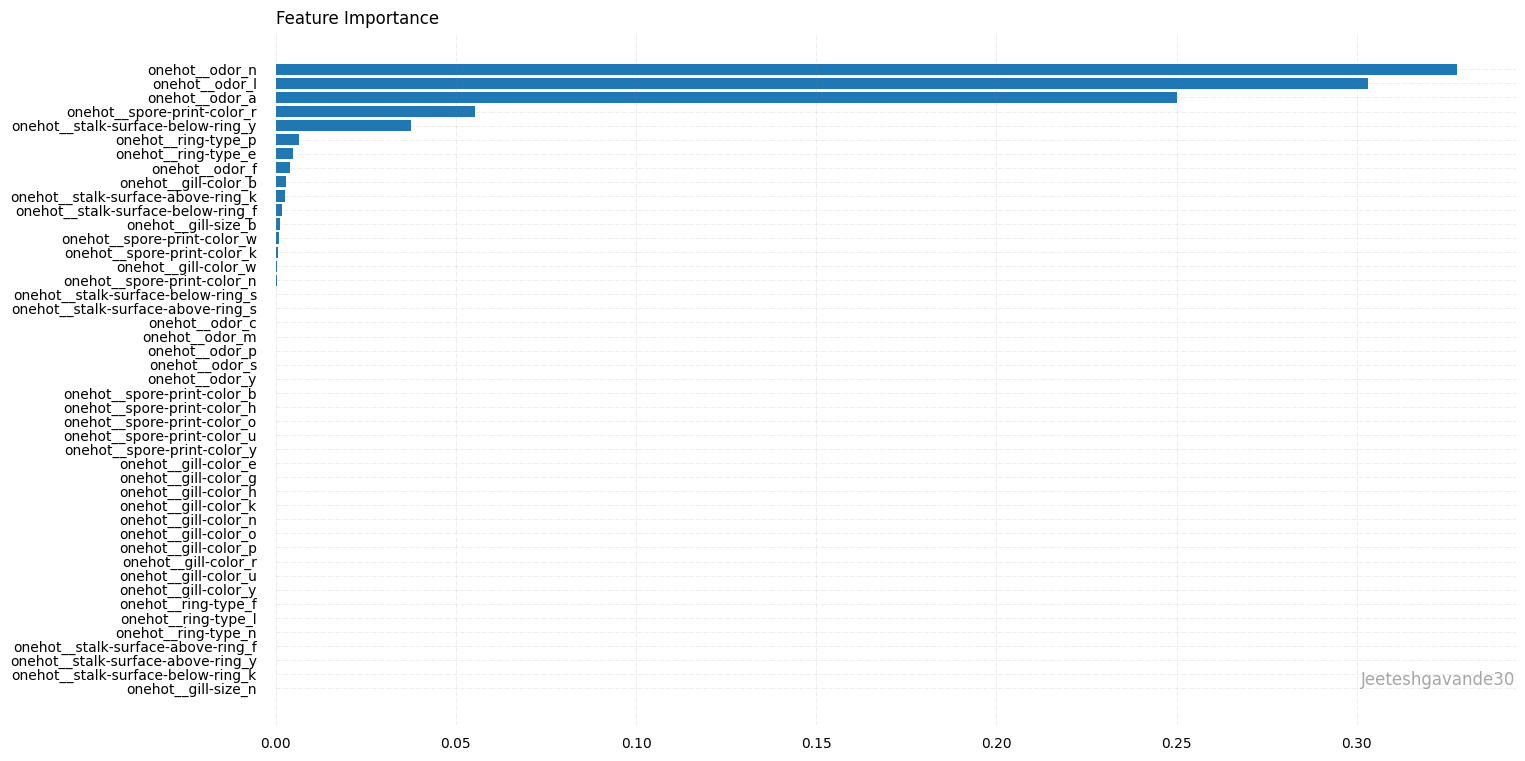

In [181]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(keys, values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Feature Importance',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

### Conclusão:
- Vamos manter somente as 12 primeiras, pois de acordo com o modelo, a importância dessas features é maior.

### Coletando as 12 features mais importantes

In [254]:
X_encoded_new = pd.DataFrame(X_encoded, columns=pre_processor.get_feature_names_out())[keys[:12]]

In [255]:
X_encoded_new

,onehot__odor_l,onehot__odor_a,onehot__odor_n,onehot__spore-print-color_r,onehot__stalk-surface-below-ring_y,onehot__ring-type_p,onehot__odor_f,onehot__gill-color_b,onehot__stalk-surface-above-ring_k,onehot__stalk-surface-below-ring_f,onehot__spore-print-color_w,onehot__gill-size_b
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8080,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8081,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8082,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_new, y_encoded, random_state=56, test_size=0.25, stratify=y_encoded)

In [269]:
model_new = XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=24
)

In [270]:
model_new.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [271]:
y_predictions = model_new.predict(X_test)

In [272]:
accuracy_score(y_predictions, y_test)

1.0

In [273]:
matrix = confusion_matrix(y_test, y_predictions, labels=[0, 1])

Text(58.222222222222214, 0.5, 'True Label')

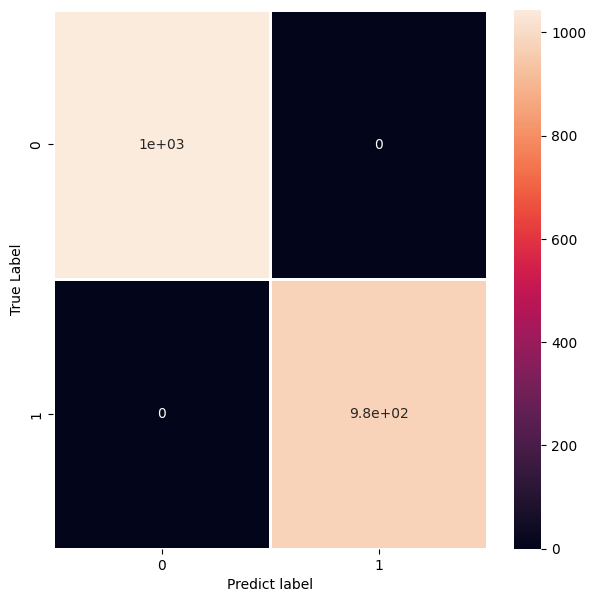

In [274]:
plt.figure(figsize=(7, 7))
sns.heatmap(matrix, annot=True, linewidths=1)
plt.xlabel('Predict label')
plt.ylabel('True Label')

In [275]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred=y_predictions, labels=[0, 1])
precision, recall, f1, support

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1044,  978], dtype=int64))

In [276]:
sorted(model_new.feature_importances_, reverse=True)

[0.36460918,
 0.28429392,
 0.23144428,
 0.05550254,
 0.045159258,
 0.0052559287,
 0.004618666,
 0.003488997,
 0.0019415458,
 0.0016099525,
 0.0010928947,
 0.0009827787]

C:\Users\gabri\AppData\Local\Temp\ipykernel_75244\3527929854.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

  ax.grid(b = True, color ='grey',


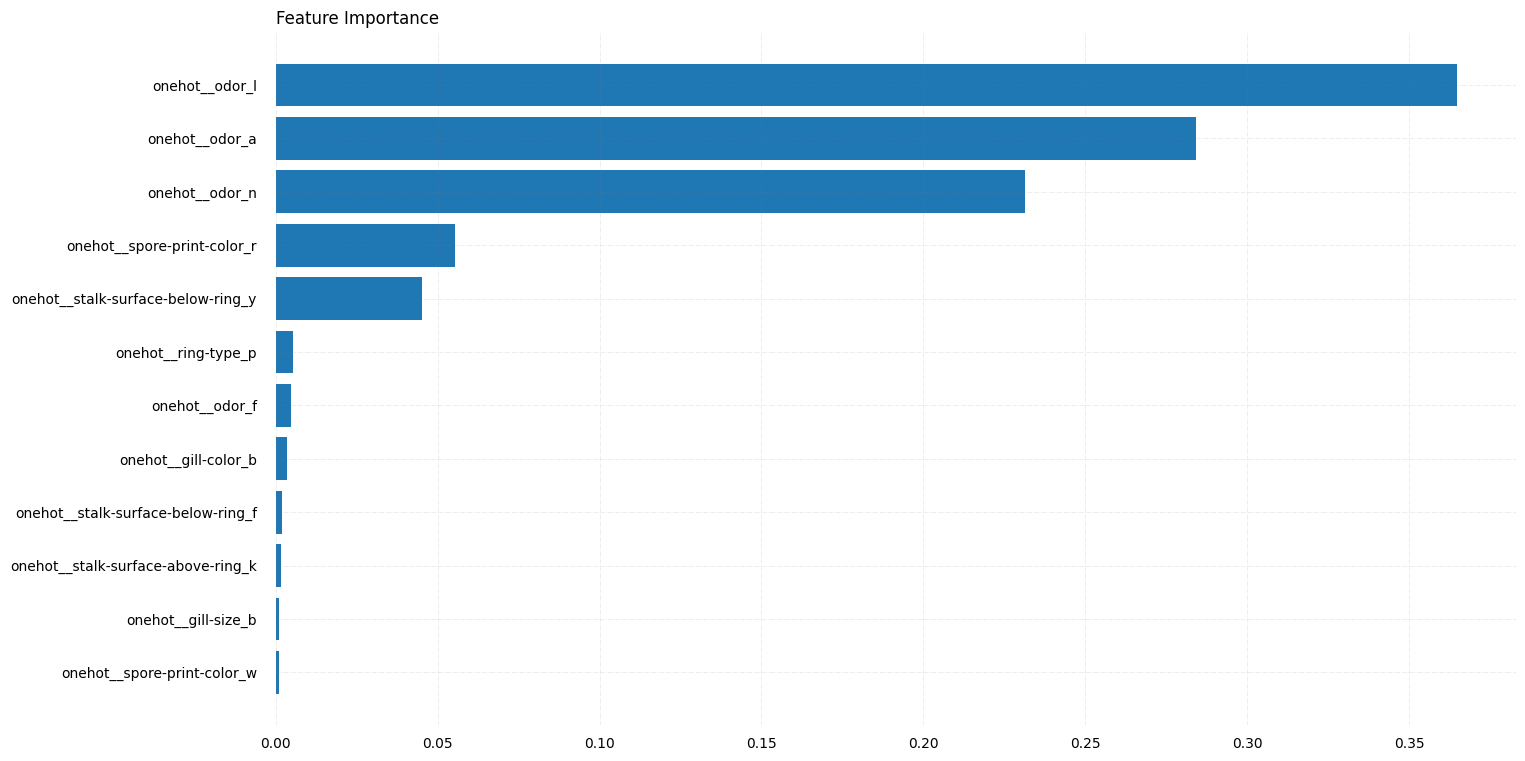

In [277]:
kv = sorted([(k, v) for k, v in zip(X_encoded_new.columns, model_new.feature_importances_)], key=lambda x: x[1], reverse=True)
keys, values = [x[0] for x in kv], [x[1] for x in kv]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(keys, values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Feature Importance',
             loc ='left', )
 
# Show Plot
plt.show()

### Cross-Validation

In [278]:
from sklearn.model_selection import cross_val_score

In [282]:
res = cross_val_score(
    model_new,
    X_encoded_new,
    y_encoded,
    cv=10,
    scoring="f1",
    n_jobs=-1,
)

In [283]:
res

array([1.       , 1.       , 1.       , 1.       , 0.9974359, 1.       ,
       1.       , 1.       , 1.       , 1.       ])

In [285]:
print('Mean scores with cross validation: ', res.mean())
print('Std scores with cross validation: ', res.std())

Mean scores with cross validation:  0.9997435897435898

Std scores with cross validation:  0.0007692307692307666


## Conclusão final:

- É possível ver que conseguimos atingir um valor considerável para o score f1. Mesmo com a validação cruzada, é possível ver que o valor se aproxima bastante de 1.
- Pelo fato de ter se aproximado tanto de 1, é possível que existam regras determinísticas para a classificação dos cogumelos.

# 5) Create pipeline and deploy
Em breve

## Appendix: MLP

Vamos utilizar as features já preparadas agora num modelo baseado em Redes Neurais. A utilização do XGboost já é suficiente e vimos que as métricas são excelentes. Vamos abordar o problema de uma outra forma e vamos ver que o resultado será bem parecido.

In [286]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded_new, y_encoded, random_state=56, test_size=0.25, stratify=y_encoded)

In [287]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=49, test_size=0.25, stratify=y_train_full)

In [288]:
import tensorflow as tf
from tensorflow import keras

In [296]:
X_encoded_new.shape

(8085, 12)

In [297]:
model_mlp = keras.models.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=[X_encoded_new.shape[1]]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [298]:
model_mlp.compile(loss='sparse_categorical_crossentropy',
                 optimizer='Adam',
                 metrics='accuracy')

In [299]:
model_mlp.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense_16 (Dense)            (None, 1024)              13312     

                                                                 

 dense_17 (Dense)            (None, 512)               524800    

                                                                 

 dense_18 (Dense)            (None, 256)               131328    

                                                                 

 dense_19 (Dense)            (None, 128)               32896     

                                                                 

 dense_20 (Dense)            (None, 64)                8256      

                                                                 

 dense_21 (Dense)            (None, 32)                2080      

                                                                 

 dense_22 (Dense)            (None, 16

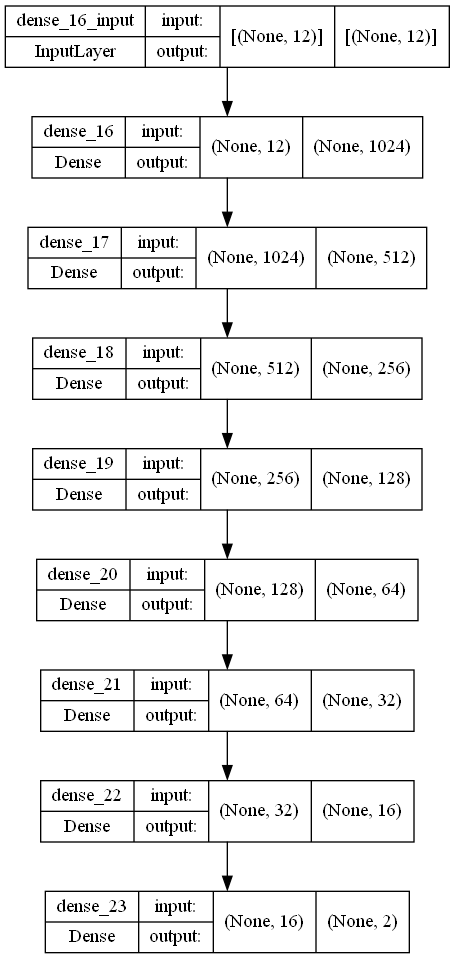

In [300]:
keras.utils.plot_model(model_mlp, to_file="mushroom.png", show_shapes=True)

### Treinando a mlp

In [301]:
callback = keras.callbacks.EarlyStopping(patience=5)

In [302]:
history_0 = model_mlp.fit(X_train, y_train, 
                          batch_size=128,
                          epochs=50,
                          verbose=1,
                          validation_data=(X_val, y_val),
                          callbacks=[callback])

Epoch 1/50

36/36 [==============================] - 1s 14ms/step - loss: 0.1615 - accuracy: 0.9710 - val_loss: 0.0060 - val_accuracy: 0.9993

Epoch 2/50

36/36 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 0.9993

Epoch 3/50

36/36 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.9985 - val_loss: 0.0041 - val_accuracy: 0.9993

Epoch 4/50

36/36 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 7.1871e-04 - val_accuracy: 0.9993

Epoch 5/50

36/36 [==============================] - 0s 8ms/step - loss: 6.8135e-04 - accuracy: 0.9998 - val_loss: 3.5782e-05 - val_accuracy: 1.0000

Epoch 6/50

36/36 [==============================] - 0s 8ms/step - loss: 1.9978e-05 - accuracy: 1.0000 - val_loss: 1.4774e-04 - val_accuracy: 1.0000

Epoch 7/50

36/36 [==============================] - 0s 9ms/step - loss: 5.8310e-05 - accuracy: 1.0000 - val_loss: 1.9987e-05 -

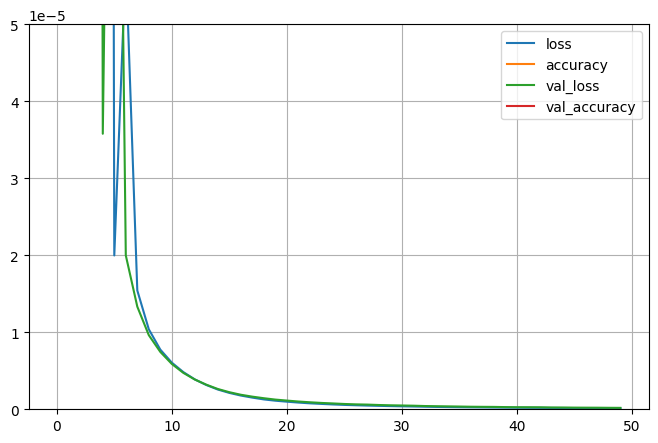

In [318]:
df_history_0 = pd.DataFrame(history_0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.00005)
plt.show()

In [319]:
y_predict_mlp = np.array([x.argmax() for x in model_mlp.predict(X_test)])
y_predict_mlp

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [320]:
accuracy_score(y_test, y_predict_mlp)

1.0

In [321]:
matrix = confusion_matrix(y_test, y_predict_mlp, labels=[0, 1])

Text(58.222222222222214, 0.5, 'True Label')

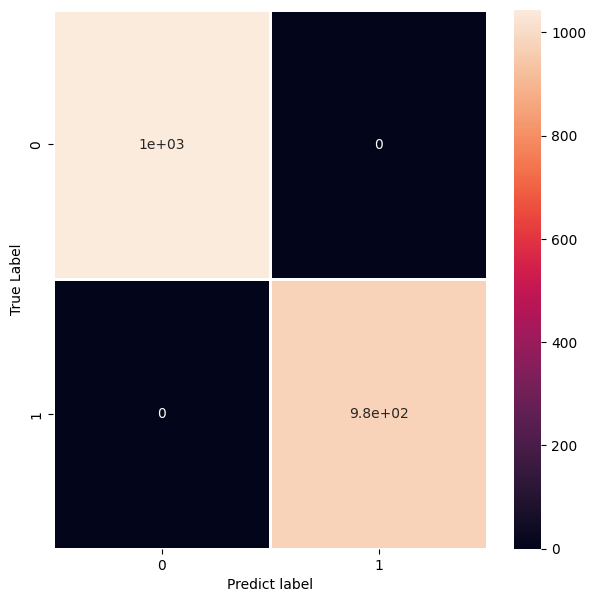

In [322]:
plt.figure(figsize=(7, 7))
sns.heatmap(matrix, annot=True, linewidths=1)
plt.xlabel('Predict label')
plt.ylabel('True Label')

In [323]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred=y_predict_mlp, labels=[0, 1])
precision, recall, f1, support

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1044,  978], dtype=int64))